In [54]:
import os
import sys
LIB = os.curdir + '/../lib'

if LIB not in sys.path:
    sys.path.append(LIB)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier

from functions import load_excel_data, load_csv_data, confusion_matrix, using_model_clf, get_roc_auc_score, load_data
%matplotlib inline

In [55]:
base_directory = '~/workspace/personal/datasets/wine'

columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
           'Total phenols ', 'Flavanoids', 'Nonflavanoid phenols', 
           'Proanthocyanins', 'Color intensity', 'Hue', 'diluted wines', 'Proline']

In [56]:
wine_data = load_csv_data(base_directory, 'wine.data', names=columns)

In [57]:
wine_data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [58]:
wine_data.describe()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


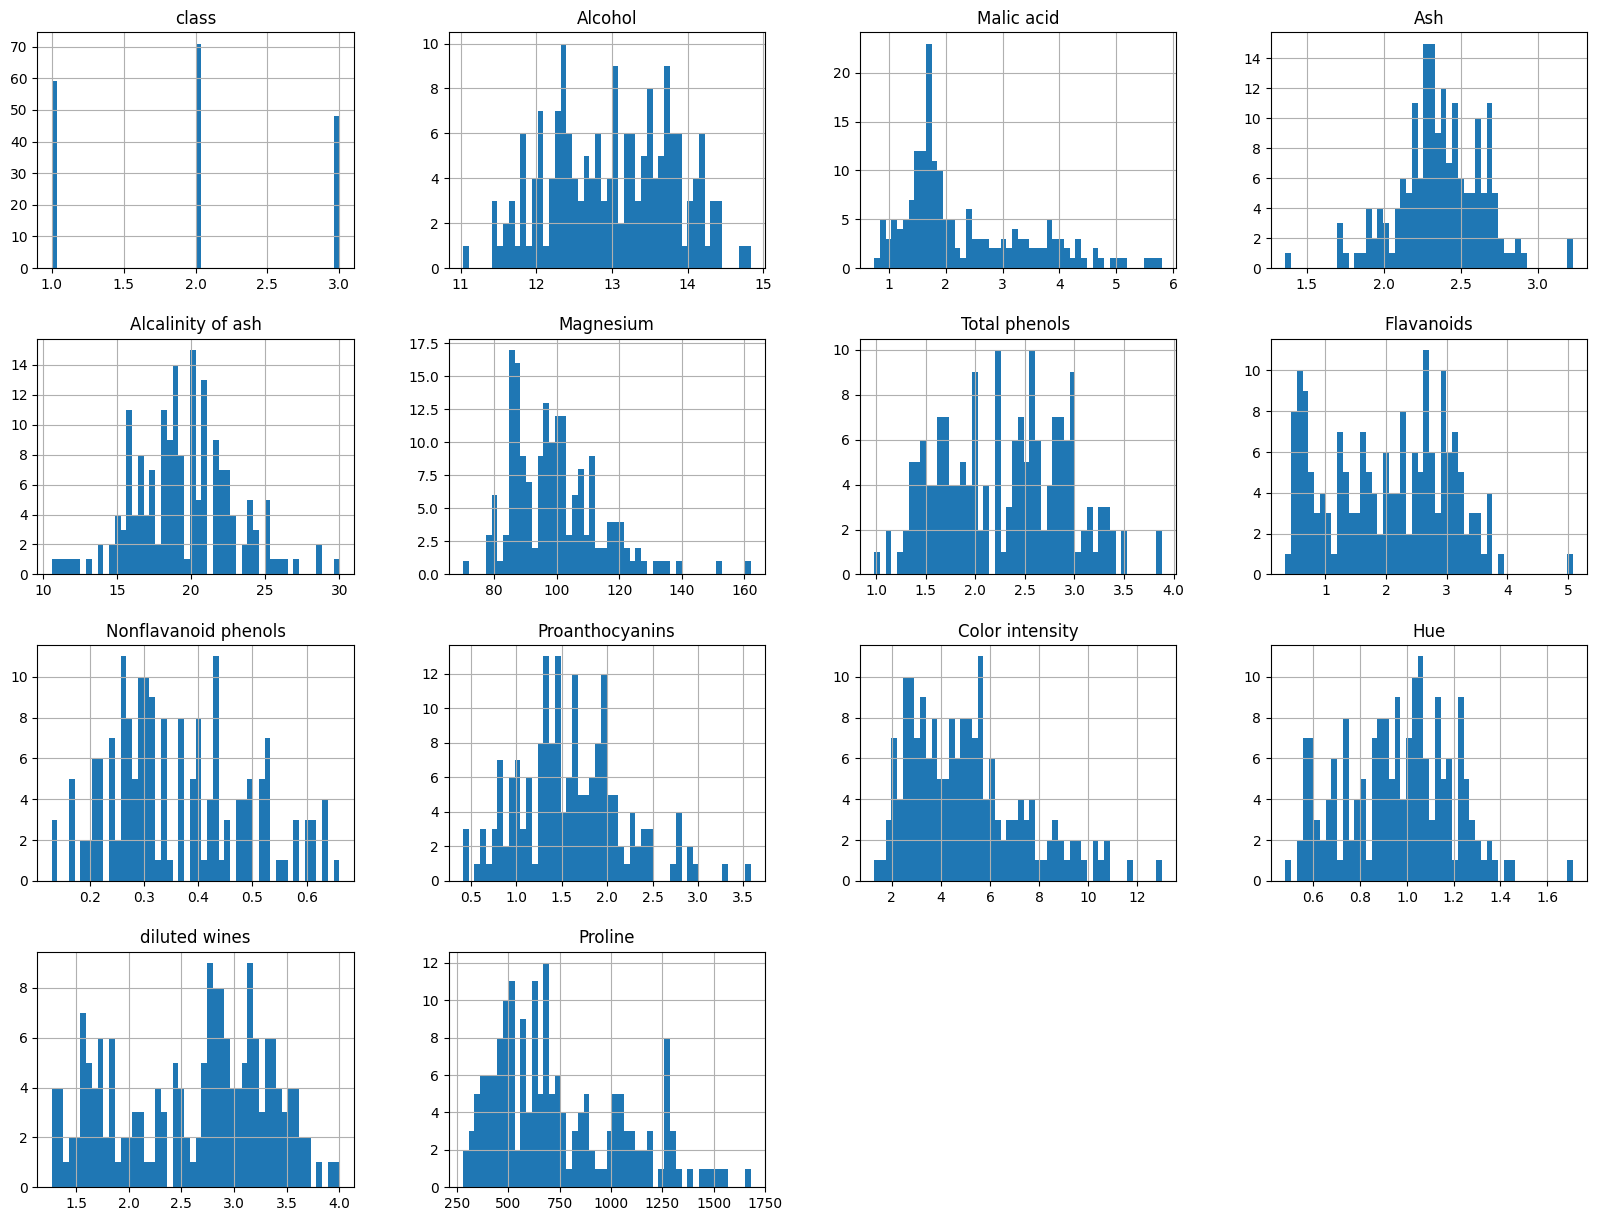

In [59]:
wine_data.hist(bins=50, figsize=(20,15))
plt.show()

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) 

for train_index, test_index in split.split(wine_data, wine_data["class"]):
        train_set = wine_data.loc[train_index]
        test_set = wine_data.loc[test_index]

In [61]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']

X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

In [62]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        #('minmax_scaler', MinMaxScaler()),
    ])

X_transformer = ColumnTransformer(transformers=[
    ("norm2", num_pipeline, columns[1:])
])


X_train_pre = X_transformer.fit_transform(X_train)
y_train_pre = LabelEncoder().fit_transform(y_train)

X_test_pre = X_transformer.fit_transform(X_test)
y_test_pre = LabelEncoder().fit_transform(y_test)

<AxesSubplot: >

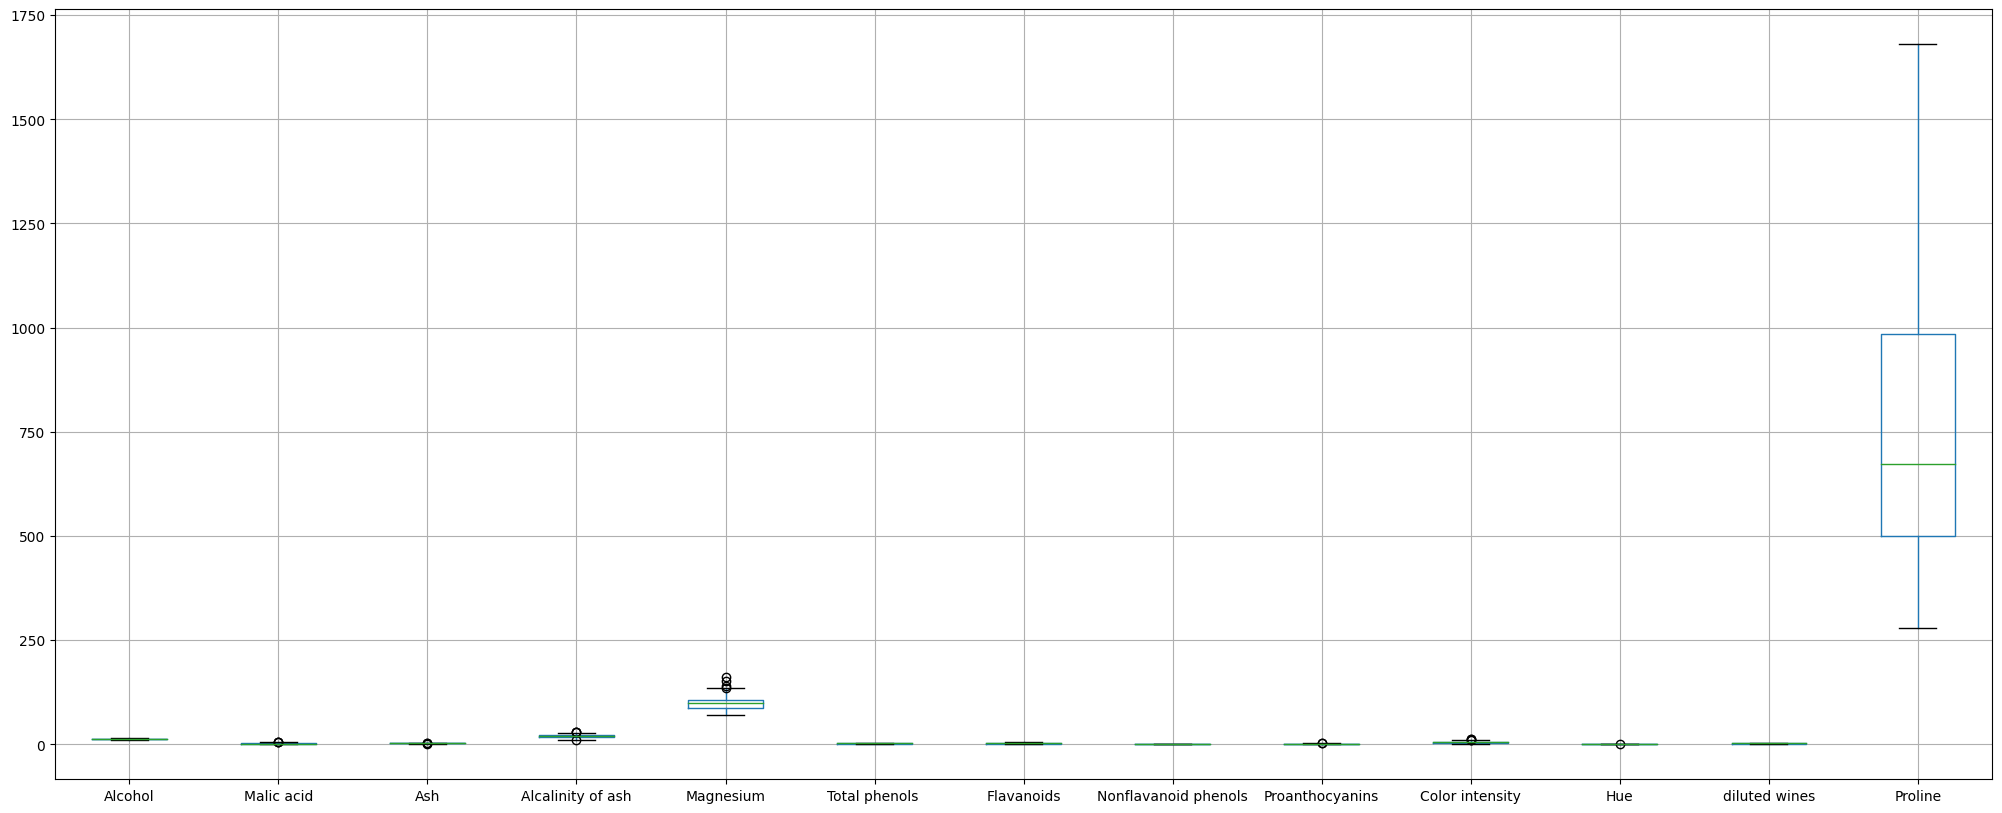

In [63]:
wine_data.boxplot(column=columns[1:], figsize=(25, 10))

<AxesSubplot: >

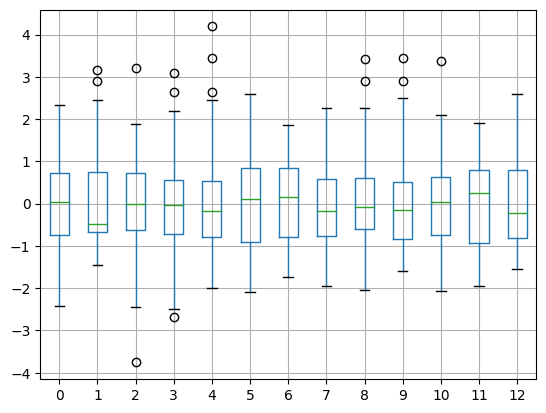

In [64]:
pd.DataFrame(X_train_pre).boxplot() 

In [65]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 5)
t = pca.fit_transform(X_train_pre)
X_train_pre[0], t


(array([ 0.38580089, -0.63787118,  1.77666817, -1.22453161,  0.69643032,
         0.52686525,  0.73229212, -0.1695489 , -0.41578344, -0.16746725,
         0.62437819,  0.2529082 ,  0.46772474]),
 array([[-1.47234303e+00, -7.34250716e-01, -4.54891817e-01,
         -1.03594755e+00,  5.49675792e-01],
        [-2.64970940e+00, -1.23021145e+00, -1.50046210e+00,
         -7.48547675e-01, -1.08490377e-01],
        [-1.88878827e+00, -7.92471604e-01,  9.91753532e-02,
         -1.00696033e+00, -7.72992340e-01],
        [-2.21115907e+00, -7.53457676e-01,  7.92728229e-01,
         -1.18832038e+00, -5.89930132e-01],
        [ 2.81757114e+00, -1.64568754e+00,  3.85180198e-01,
          1.45549667e-01, -5.62509609e-01],
        [ 3.73165137e+00, -9.43745154e-01,  1.27412107e+00,
         -6.44866225e-01, -2.34790301e-01],
        [-2.00318459e+00,  1.48866684e+00,  1.46729734e+00,
          1.89916623e+00,  3.88604427e+00],
        [ 2.28749052e+00, -2.37989381e+00, -4.36986113e-01,
          1.41615

In [66]:
using_model_clf(LogisticRegression(multi_class='multinomial'), X_train, y_train, X_test, y_test)

****************** LogisticRegression(multi_class='multinomial') ******************
accuracy_score= 0.9722222222222222
precision_score= 0.9722222222222222
recall_score= 0.9722222222222222
f1_score=[1.         0.96551724 0.94736842], f1_score_micro=0.9722222222222222, f1_score_macro=0.9709618874773142


/Users/piyushr/workspace/personal/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [67]:
from sklearn.linear_model import RidgeClassifier

using_model_clf(RidgeClassifier(), X_train, y_train, X_test, y_test)

****************** RidgeClassifier() ******************
accuracy_score= 0.9722222222222222
precision_score= 0.9722222222222222
recall_score= 0.9722222222222222
f1_score=[1.         0.96551724 0.94736842], f1_score_micro=0.9722222222222222, f1_score_macro=0.9709618874773142


RidgeClassifier()

In [68]:
from sklearn.ensemble import HistGradientBoostingClassifier

using_model_clf(HistGradientBoostingClassifier(), X_train, y_train, X_test, y_test)

****************** HistGradientBoostingClassifier() ******************
accuracy_score= 1.0
precision_score= 1.0
recall_score= 1.0
f1_score=[1. 1. 1.], f1_score_micro=1.0, f1_score_macro=1.0


HistGradientBoostingClassifier()

In [69]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

using_model_clf(OneVsRestClassifier(LinearSVC(random_state=0)), X_train, y_train, X_test, y_test)

****************** OneVsRestClassifier(estimator=LinearSVC(random_state=0)) ******************
accuracy_score= 0.7222222222222222
precision_score= 0.7222222222222222
recall_score= 0.7222222222222222
f1_score=[0.85714286 0.66666667 0.66666667], f1_score_micro=0.7222222222222222, f1_score_macro=0.7301587301587301


/Users/piyushr/workspace/personal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/piyushr/workspace/personal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/piyushr/workspace/personal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OneVsRestClassifier(estimator=LinearSVC(random_state=0))

In [70]:
from sklearn.tree import DecisionTreeClassifier

using_model_clf(DecisionTreeClassifier(random_state=0), X_train, y_train, X_test, y_test)

****************** DecisionTreeClassifier(random_state=0) ******************
accuracy_score= 0.9444444444444444
precision_score= 0.9444444444444444
recall_score= 0.9444444444444444
f1_score=[0.91666667 0.92857143 1.        ], f1_score_micro=0.9444444444444444, f1_score_macro=0.9484126984126985


DecisionTreeClassifier(random_state=0)

In [71]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=1000,
        max_samples=14, bootstrap=True, n_jobs=-1)
using_model_clf(bag_clf, X_train, y_train, X_test, y_test)

****************** BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=14,
                  n_estimators=1000, n_jobs=-1) ******************
accuracy_score= 0.9722222222222222
precision_score= 0.9722222222222222
recall_score= 0.9722222222222222
f1_score=[0.96       0.96296296 1.        ], f1_score_micro=0.9722222222222222, f1_score_macro=0.9743209876543211


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=14,
                  n_estimators=1000, n_jobs=-1)

In [72]:
using_model_clf(AdaBoostClassifier(), X_train, y_train, X_test, y_test)

****************** AdaBoostClassifier() ******************
accuracy_score= 0.8333333333333334
precision_score= 0.8333333333333334
recall_score= 0.8333333333333334
f1_score=[0.8        0.78571429 0.94736842], f1_score_micro=0.8333333333333334, f1_score_macro=0.8443609022556391


AdaBoostClassifier()

In [73]:
a = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=225, 
                       algorithm="SAMME.R", learning_rate=0.3)
using_model_clf(a, X_train, y_train, X_test, y_test)

****************** AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.3, n_estimators=225) ******************
accuracy_score= 1.0
precision_score= 1.0
recall_score= 1.0
f1_score=[1. 1. 1.], f1_score_micro=1.0, f1_score_macro=1.0


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.3, n_estimators=225)

In [74]:
from sklearn.svm import SVC

using_model_clf(SVC(), X_train, y_train, X_test, y_test)

****************** SVC() ******************
accuracy_score= 0.6944444444444444
precision_score= 0.6944444444444444
recall_score= 0.6944444444444444
f1_score=[0.91666667 0.75675676 0.        ], f1_score_micro=0.6944444444444444, f1_score_macro=0.5578078078078078


SVC()

In [75]:
ovr = OneVsRestClassifier(SVC())

using_model_clf(ovr, X_train, y_train, X_test, y_test)

****************** OneVsRestClassifier(estimator=SVC()) ******************
accuracy_score= 0.7222222222222222
precision_score= 0.7222222222222222
recall_score= 0.7222222222222222
f1_score=[0.96       0.75675676 0.        ], f1_score_micro=0.7222222222222222, f1_score_macro=0.5722522522522523


OneVsRestClassifier(estimator=SVC())

In [76]:
from sklearn.neighbors import KNeighborsClassifier

using_model_clf(KNeighborsClassifier(), X_train, y_train, X_test, y_test)

****************** KNeighborsClassifier() ******************
accuracy_score= 0.8055555555555556
precision_score= 0.8055555555555556
recall_score= 0.8055555555555556
f1_score=[1.         0.74074074 0.66666667], f1_score_micro=0.8055555555555556, f1_score_macro=0.8024691358024691


KNeighborsClassifier()

In [77]:
rfc = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)

using_model_clf(rfc, X_train, y_train, X_test, y_test)

****************** RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1) ******************
accuracy_score= 1.0
precision_score= 1.0
recall_score= 1.0
f1_score=[1. 1. 1.], f1_score_micro=1.0, f1_score_macro=1.0


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)